In [1]:
!pip install pyspark

In [2]:
import pyspark

In [3]:
import pandas as pd
import json

In [4]:
pd.read_csv(r"C:\Users\Chinnu\Downloads\DS_Assignment - internship\Screening Test - DS\iris.csv")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
from pyspark.sql import SparkSession

In [6]:
spark=SparkSession.builder.appName('Iris').getOrCreate()

In [7]:
spark

In [8]:
#importing the dataset
df=spark.read.csv((r"C:\Users\Chinnu\Downloads\DS_Assignment - internship\Screening Test - DS\iris.csv"),header=True,inferSchema=True)


df = spark.read.json(r"C:\Users\Chinnu\Downloads\DS_Assignment - internship\Screening Test - DS\algoparams_from_ui.json.rtf", multiLine=True)

df.printSchema()

df.write.format("csv").option("header", "true").save(r"C:\Users\Chinnu\Downloads\DS_Assignment - internship\Screening Test - DS\convertedfile1.csv")

In [9]:
df.show(5)# top 5 rows

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



In [10]:
df.printSchema()# to check the attributes

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [11]:
df.columns # column names in the csv dataset

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [12]:
df.dtypes # types of the columns

[('sepal_length', 'double'),
 ('sepal_width', 'double'),
 ('petal_length', 'double'),
 ('petal_width', 'double'),
 ('species', 'string')]

In [13]:
df.describe().show()# shows the statistical information

+-------+------------------+-------------------+------------------+------------------+--------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|       species|
+-------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|                150|               150|               150|           150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          null|
|    min|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+-------------------+------------------+------------------+--------------+



In [14]:
df.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [15]:
#to find null values
from pyspark.sql.functions import isnull

In [16]:
null_counts = [df.filter(df[column].isNull()).count() for column in df.columns]

In [17]:
print("Number of missing values in each column:")
for column, count in zip(df.columns, null_counts):
    print(f"{column}: {count}")


Number of missing values in each column:
sepal_length: 0
sepal_width: 0
petal_length: 0
petal_width: 0
species: 0


This dataset has no null values

In [18]:
df.select(isnull(df.sepal_length)).show()

+----------------------+
|(sepal_length IS NULL)|
+----------------------+
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
|                 false|
+----------------------+
only showing top 20 rows



This dataset has no null values

In [19]:
df.columns 

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [20]:
# fill by imputation
from pyspark .ml.feature import Imputer

In [21]:
imputer = Imputer(
    inputCols=['sepal_length', 'sepal_width', 'petal_length'], 
    outputCols=["{}_imputed".format(c) for c in ['sepal_length', 'sepal_width', 'petal_length']]
    ).setStrategy("mean")

In [22]:
#adding imputation columns to df
imputer.fit(df).transform(df).show()

+------------+-----------+------------+-----------+-----------+--------------------+-------------------+--------------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|sepal_length_imputed|sepal_width_imputed|petal_length_imputed|
+------------+-----------+------------+-----------+-----------+--------------------+-------------------+--------------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|                 5.1|                3.5|                 1.4|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|                 4.9|                3.0|                 1.4|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|                 4.7|                3.2|                 1.3|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|                 4.6|                3.1|                 1.5|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|                 5.0|                3.6|              

In [23]:
#preprocessing
from pyspark.ml.feature import StringIndexer# to convert categorical into numerical
indexer=StringIndexer(inputCol="species",outputCol="species_Index")

In [24]:
df_data=indexer.fit(df).transform(df)

In [25]:
df_data.show()

+------------+-----------+------------+-----------+-----------+-------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|species_Index|
+------------+-----------+------------+-----------+-----------+-------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|          0.0|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|          0.0|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|          0.0|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|          0.0|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|          0.0|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|          0.0|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|          0.0|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|          0.0|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|          0.0|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa| 

In [26]:
df_data.distinct().count()# total no. of rows

147

In [27]:
a = df_data.select(['species','species_Index']).distinct()

In [28]:
a.show()

+---------------+-------------+
|        species|species_Index|
+---------------+-------------+
|    Iris-setosa|          0.0|
| Iris-virginica|          2.0|
|Iris-versicolor|          1.0|
+---------------+-------------+



Three varities of Iris label encoded to 0,1,2

In [29]:
#correlation between attributes
from pyspark.ml.stat import Correlation

df.corr("sepal_length",'petal_width')

0.8179536333691642

In [30]:
df.corr("sepal_width",'petal_width')

-0.35654408961380507

In [31]:
df.corr("petal_length",'petal_width')

0.9627570970509666

In [32]:
df.corr("petal_width",'petal_width')

1.0

In [33]:
# converting to vector assemblers
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['sepal_length', 'sepal_width', 'petal_length',
                                          'species_Index' ],outputCol='indep_feat')
output=featureassembler.transform(df_data)
output.show()

+------------+-----------+------------+-----------+-----------+-------------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|species_Index|       indep_feat|
+------------+-----------+------------+-----------+-----------+-------------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|          0.0|[5.1,3.5,1.4,0.0]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|          0.0|[4.9,3.0,1.4,0.0]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|          0.0|[4.7,3.2,1.3,0.0]|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|          0.0|[4.6,3.1,1.5,0.0]|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|          0.0|[5.0,3.6,1.4,0.0]|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|          0.0|[5.4,3.9,1.7,0.0]|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|          0.0|[4.6,3.4,1.4,0.0]|
|         5.0|        3.4|         1.5| 

In [34]:
output.select('indep_feat').show()

+-----------------+
|       indep_feat|
+-----------------+
|[5.1,3.5,1.4,0.0]|
|[4.9,3.0,1.4,0.0]|
|[4.7,3.2,1.3,0.0]|
|[4.6,3.1,1.5,0.0]|
|[5.0,3.6,1.4,0.0]|
|[5.4,3.9,1.7,0.0]|
|[4.6,3.4,1.4,0.0]|
|[5.0,3.4,1.5,0.0]|
|[4.4,2.9,1.4,0.0]|
|[4.9,3.1,1.5,0.0]|
|[5.4,3.7,1.5,0.0]|
|[4.8,3.4,1.6,0.0]|
|[4.8,3.0,1.4,0.0]|
|[4.3,3.0,1.1,0.0]|
|[5.8,4.0,1.2,0.0]|
|[5.7,4.4,1.5,0.0]|
|[5.4,3.9,1.3,0.0]|
|[5.1,3.5,1.4,0.0]|
|[5.7,3.8,1.7,0.0]|
|[5.1,3.8,1.5,0.0]|
+-----------------+
only showing top 20 rows



In [35]:
output.show()

+------------+-----------+------------+-----------+-----------+-------------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|species_Index|       indep_feat|
+------------+-----------+------------+-----------+-----------+-------------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|          0.0|[5.1,3.5,1.4,0.0]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|          0.0|[4.9,3.0,1.4,0.0]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|          0.0|[4.7,3.2,1.3,0.0]|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|          0.0|[4.6,3.1,1.5,0.0]|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|          0.0|[5.0,3.6,1.4,0.0]|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|          0.0|[5.4,3.9,1.7,0.0]|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|          0.0|[4.6,3.4,1.4,0.0]|
|         5.0|        3.4|         1.5| 

In [36]:
final_data=output.select("indep_feat","petal_width")

In [37]:
final_data.show()

+-----------------+-----------+
|       indep_feat|petal_width|
+-----------------+-----------+
|[5.1,3.5,1.4,0.0]|        0.2|
|[4.9,3.0,1.4,0.0]|        0.2|
|[4.7,3.2,1.3,0.0]|        0.2|
|[4.6,3.1,1.5,0.0]|        0.2|
|[5.0,3.6,1.4,0.0]|        0.2|
|[5.4,3.9,1.7,0.0]|        0.4|
|[4.6,3.4,1.4,0.0]|        0.3|
|[5.0,3.4,1.5,0.0]|        0.2|
|[4.4,2.9,1.4,0.0]|        0.2|
|[4.9,3.1,1.5,0.0]|        0.1|
|[5.4,3.7,1.5,0.0]|        0.2|
|[4.8,3.4,1.6,0.0]|        0.2|
|[4.8,3.0,1.4,0.0]|        0.1|
|[4.3,3.0,1.1,0.0]|        0.1|
|[5.8,4.0,1.2,0.0]|        0.2|
|[5.7,4.4,1.5,0.0]|        0.4|
|[5.4,3.9,1.3,0.0]|        0.4|
|[5.1,3.5,1.4,0.0]|        0.3|
|[5.7,3.8,1.7,0.0]|        0.3|
|[5.1,3.8,1.5,0.0]|        0.3|
+-----------------+-----------+
only showing top 20 rows



In [38]:
# Linear Regression
from pyspark.ml.regression import LinearRegression
##train test split
train_data,test_data=final_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol='indep_feat', labelCol='petal_width')
regressor=regressor.fit(train_data)

In [39]:
regressor.coefficients

DenseVector([-0.1041, 0.2166, 0.3185, 0.3883])

In [40]:
regressor.intercept

-0.41878606919607897

In [41]:

### Predictions
pred_results=regressor.evaluate(test_data)

In [42]:
## Final comparison
pred_results.predictions.show()

+-----------------+-----------+-------------------+
|       indep_feat|petal_width|         prediction|
+-----------------+-----------+-------------------+
|[4.6,3.2,1.4,0.0]|        0.2| 0.2413651912128304|
|[4.8,3.4,1.9,0.0]|        0.2|0.42312734377000294|
|[4.9,3.1,1.5,0.0]|        0.1|0.22033019013628818|
|[5.0,3.0,1.6,0.0]|        0.2|0.22011506234048472|
|[5.1,3.8,1.6,0.0]|        0.2| 0.3829713904030676|
|[5.2,2.7,3.9,1.0]|        1.4| 1.2552501509595837|
|[5.4,3.9,1.7,0.0]|        0.4| 0.4052529555022636|
|[5.5,2.4,3.8,1.0]|        1.1| 1.1271923998424347|
|[5.5,2.5,4.0,1.0]|        1.3| 1.2125568667951727|
|[5.5,3.5,1.3,0.0]|        0.2|0.18079751878068007|
|[5.5,4.2,1.4,0.0]|        0.2| 0.3642585923281977|
|[5.7,2.5,5.0,2.0]|        2.0| 1.8985766095562298|
|[5.7,2.8,4.5,1.0]|        1.3| 1.4159773024402145|
|[5.8,2.6,4.0,1.0]|        1.2| 1.2029853399619344|
|[5.8,2.7,5.1,2.0]|        1.9|  1.963336331024033|
|[5.9,3.0,5.1,2.0]|        1.8|  2.017901243647271|
|[6.1,3.0,4.

In [43]:
### PErformance Metrics
pred_results.r2,pred_results.meanAbsoluteError,pred_results.meanSquaredError

(0.9228360224789041, 0.1437329623416767, 0.03791752117633852)

In [44]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="petal_width", metricName="rmse")

In [45]:

pred_results=regressor.transform(test_data)



In [46]:
rmse = evaluator.evaluate(pred_results)

In [47]:
#RMSE 
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.19472421825838337


In [48]:
df_data.show()

+------------+-----------+------------+-----------+-----------+-------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|species_Index|
+------------+-----------+------------+-----------+-----------+-------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|          0.0|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|          0.0|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|          0.0|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|          0.0|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|          0.0|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|          0.0|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|          0.0|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|          0.0|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|          0.0|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa| 

In [49]:
#pca reduction
from pyspark.ml.feature import PCA

In [50]:
pca = PCA(k=2, inputCol='indep_feat', outputCol='features_pca')

In [51]:
pca_model = pca.fit(final_data)

In [52]:
pca_data = pca_model.transform(final_data).select('features_pca')

In [53]:
import numpy as np

target = np.array(df_data.select(['petal_width']).collect()).reshape(-1)

features = np.array(pca_data.collect()).reshape(-1, 2)

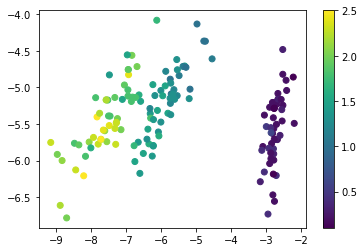

In [54]:
import matplotlib.pyplot as plt

plt.scatter(features[:, 0], features[:, 1], c=target)
plt.colorbar();

In [55]:
#decision tree

from pyspark.ml import Pipeline
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

dt = DecisionTreeRegressor(labelCol='petal_width', featuresCol='indep_feat')



In [56]:
#splitting test and train data
(train_data, test_data) = final_data .randomSplit([0.7, 0.3])

In [57]:
dt = DecisionTreeRegressor(labelCol='petal_width', featuresCol='indep_feat')
dt = dt.fit(train_data)#fitting the model

In [58]:
pred = dt.transform(test_data)# predicting the output

In [59]:
from pyspark.ml.evaluation import RegressionEvaluator
pred.select("prediction", "petal_width", "indep_feat").show()


+-------------------+-----------+-----------------+
|         prediction|petal_width|       indep_feat|
+-------------------+-----------+-----------------+
|0.20000000000000004|        0.2|[4.4,2.9,1.4,0.0]|
|0.20000000000000004|        0.2|[4.4,3.0,1.3,0.0]|
|0.20000000000000004|        0.3|[4.5,2.3,1.3,0.0]|
|0.26363636363636367|        0.2|[4.6,3.6,1.0,0.0]|
|0.20000000000000004|        0.2|[4.8,3.1,1.6,0.0]|
|                0.4|        0.2|[4.8,3.4,1.6,0.0]|
|              1.025|        1.0|[4.9,2.4,3.3,1.0]|
|0.15000000000000002|        0.1|[4.9,3.1,1.5,0.0]|
|0.15000000000000002|        0.1|[4.9,3.1,1.5,0.0]|
|              1.025|        1.0|[5.0,2.0,3.5,1.0]|
|                0.2|        0.2|[5.0,3.2,1.2,0.0]|
|                0.2|        0.5|[5.1,3.3,1.7,0.0]|
| 0.3999999999999999|        0.3|[5.1,3.8,1.5,0.0]|
|                0.6|        0.2|[5.1,3.8,1.6,0.0]|
|0.26363636363636367|        0.2|[5.2,3.4,1.4,0.0]|
| 0.3999999999999999|        0.1|[5.2,4.1,1.5,0.0]|
|0.263636363

In [60]:
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="petal_width", metricName="mse")

In [61]:
mse = evaluator.evaluate(pred)

In [62]:
print(" Mean Squared Error (MSE)  = %g" % mse)

 Mean Squared Error (MSE)  = 0.0448906


In [63]:
evaluator1 = RegressionEvaluator(predictionCol="prediction", labelCol="petal_width", metricName="r2")

In [64]:
rscore = evaluator1.evaluate(pred)

In [65]:
print(" R_Score = %g" % rscore)

 R_Score = 0.921166


In [66]:
from pyspark.sql.functions import col
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

In [67]:
# Create initial LinearRegression model
lr = LinearRegression(labelCol="petal_width", featuresCol='indep_feat')

In [68]:
# Create ParamGrid for Cross Validation
lrparamGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.001, 0.01, 0.1, 0.5, 1.0, 2.0])
             #  .addGrid(lr.regParam, [0.01, 0.1, 0.5])
             .addGrid(lr.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])
             #  .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10, 20, 50])
             #  .addGrid(lr.maxIter, [1, 5, 10])
             .build())

In [69]:
# Evaluate model
lrevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="petal_width", metricName="rmse")

In [70]:
# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator = lr,
                    estimatorParamMaps = lrparamGrid,
                    evaluator = lrevaluator,
                    numFolds = 5)


In [71]:
lr=LinearRegression(featuresCol='indep_feat', labelCol='petal_width')

In [72]:
# Run cross validations
lrmodel = lrcv.fit(train_data)

In [73]:
lrpredictions = lrmodel.transform(test_data)

In [74]:
# Evaluate the predictions
rmse =lrevaluator.evaluate(lrpredictions)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.18146110494414805


In [75]:
from matplotlib import pyplot as plt

In [76]:
Linear_Regr= 0.943
Decision_Tree= 0.799

In [77]:
labels = ["Linear Regression", "Decision Tree"]

In [78]:
R_score = [Linear_Regr, Decision_Tree]

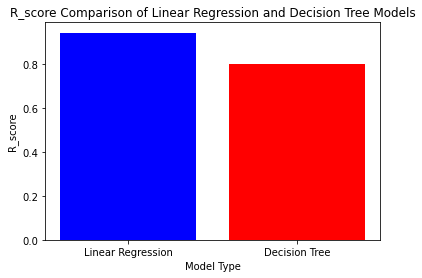

In [79]:
# Create the bar plot
plt.bar(labels, R_score, color=["blue", "red"])
plt.xlabel("Model Type")
plt.ylabel("R_score")
plt.title("R_score Comparison of Linear Regression and Decision Tree Models")

# Show the plot
plt.show()

In [80]:
## Final comparison
lrpredictions .show()

+-----------------+-----------+--------------------+
|       indep_feat|petal_width|          prediction|
+-----------------+-----------+--------------------+
|[4.4,2.9,1.4,0.0]|        0.2| 0.24464247130161615|
|[4.4,3.0,1.3,0.0]|        0.2|  0.2326494923655132|
|[4.5,2.3,1.3,0.0]|        0.3|0.023560728740812206|
|[4.6,3.6,1.0,0.0]|        0.2|  0.2330135423583664|
|[4.8,3.1,1.6,0.0]|        0.2|  0.2878414011231389|
|[4.8,3.4,1.6,0.0]|        0.2|  0.3680509036026501|
|[4.9,2.4,3.3,1.0]|        1.0|  1.0466582774902855|
|[4.9,3.1,1.5,0.0]|        0.1| 0.22717866352135724|
|[4.9,3.1,1.5,0.0]|        0.1| 0.22717866352135724|
|[5.0,2.0,3.5,1.0]|        1.0|  0.9952379758703096|
|[5.0,3.2,1.2,0.0]|        0.2| 0.11579346722086607|
|[5.1,3.3,1.7,0.0]|        0.5| 0.31424410902122907|
|[5.1,3.8,1.5,0.0]|        0.3| 0.37046765362853434|
|[5.1,3.8,1.6,0.0]|        0.2|  0.4091971333911411|
|[5.2,3.4,1.4,0.0]|        0.2|  0.2028589127207377|
|[5.2,4.1,1.5,0.0]|        0.1| 0.428743898268